<a href="https://colab.research.google.com/github/msatyajit7045/Bengaluru-Weather-Report/blob/main/Bengaluru_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [180]:
#Reading the csv file
path= "/content/Bengaluru weather.csv"
df = pd.read_csv(path)

## **Details of DataFrame**


In [181]:
# lets see some top rows
df.head()

,time,temperature_2m_mean (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,2/18/2020,22.0,22.0,0.0,0.0,0,14.8,34.9,94.0,5.97
1,2/19/2020,22.5,23.0,0.0,0.0,0,15.5,29.2,97.0,5.63
2,2/20/2020,22.0,22.1,0.0,0.0,0,15.4,31.3,98.0,5.97
3,2/21/2020,22.3,22.8,0.0,0.0,0,15.6,28.8,105.0,5.84
4,2/22/2020,22.6,23.8,0.0,0.0,0,15.7,29.5,97.0,5.56


In [182]:
# let see some bottom rows
df.tail(10)

,time,temperature_2m_mean (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
1087,2/9/2023,22.5,22.8,0.0,0.0,0,14.2,33.5,85.0,5.45
1088,2/10/2023,22.3,21.8,0.0,0.0,0,15.3,35.3,80.0,5.67
1089,2/11/2023,22.2,21.2,0.0,0.0,0,12.8,30.6,79.0,5.67
1090,2/12/2023,22.6,21.9,0.0,0.0,0,15.7,35.3,84.0,6.07
1091,2/13/2023,NaN,NaN,NaN,NaN,0,9.8,16.6,NaN,NaN
1092,2/14/2023,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1093,2/15/2023,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1094,2/16/2023,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1095,2/17/2023,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1096,2/18/2023,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [183]:
# print technical information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             1097 non-null   object 
 1   temperature_2m_mean (°C)         1091 non-null   float64
 2   apparent_temperature_mean (°C)   1091 non-null   float64
 3   precipitation_sum (mm)           1091 non-null   float64
 4   rain_sum (mm)                    1091 non-null   float64
 5   precipitation_hours (h)          1097 non-null   int64  
 6   windspeed_10m_max (km/h)         1092 non-null   float64
 7   windgusts_10m_max (km/h)         1092 non-null   float64
 8   winddirection_10m_dominant (°)   1091 non-null   float64
 9   et0_fao_evapotranspiration (mm)  1091 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 85.8+ KB


In [184]:
#Changing The datatype of time column
df['time']=df['time'].astype('datetime64[D]')


In [185]:

df['Month']=df['time'].dt.month


In [186]:
df = df.drop(columns = ['time'])

In [187]:
df.head()

,temperature_2m_mean (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),Month
0,22.0,22.0,0.0,0.0,0,14.8,34.9,94.0,5.97,2
1,22.5,23.0,0.0,0.0,0,15.5,29.2,97.0,5.63,2
2,22.0,22.1,0.0,0.0,0,15.4,31.3,98.0,5.97,2
3,22.3,22.8,0.0,0.0,0,15.6,28.8,105.0,5.84,2
4,22.6,23.8,0.0,0.0,0,15.7,29.5,97.0,5.56,2


In [75]:
# shape of tha dataframe
df.shape

(1097, 12)

In [188]:
# check for Null values in our data frame.
df.isnull().sum()

temperature_2m_mean (°C)           6
apparent_temperature_mean (°C)     6
precipitation_sum (mm)             6
rain_sum (mm)                      6
precipitation_hours (h)            0
windspeed_10m_max (km/h)           5
windgusts_10m_max (km/h)           5
winddirection_10m_dominant (°)     6
et0_fao_evapotranspiration (mm)    6
Month                              0
dtype: int64

In [189]:
#dropping raw with missing value
df=df.dropna()

In [152]:
df.isnull().sum()


temperature_2m_mean (°C)           0
apparent_temperature_mean (°C)     0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
windspeed_10m_max (km/h)           0
windgusts_10m_max (km/h)           0
winddirection_10m_dominant (°)     0
et0_fao_evapotranspiration (mm)    0
Month                              0
dtype: int64

In [79]:
df.shape

(1091, 12)

# **Data Cleaning**

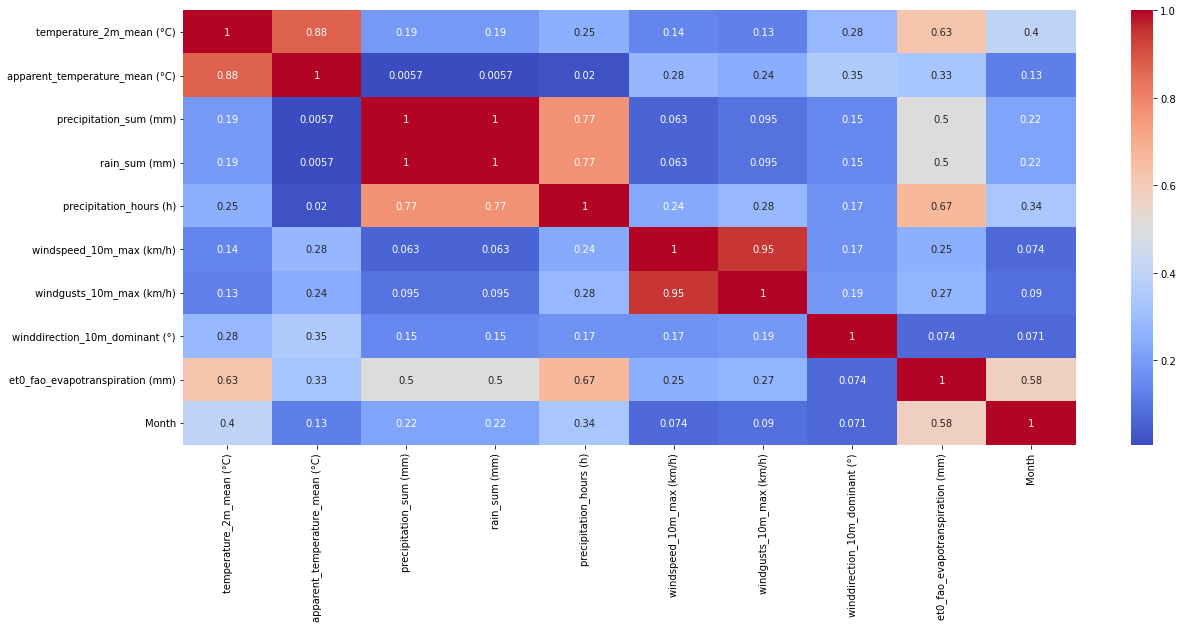

In [190]:
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

In [ ]:
temperature_2m_max (°C)            5
temperature_2m_min (°C)            5
temperature_2m_mean (°C)           6
apparent_temperature_max (°C)      5
apparent_temperature_min (°C)      5
apparent_temperature_mean (°C)     6
shortwave_radiation_sum (MJ/m²)    6
rain_sum (mm)                      6
windspeed_10m_max (km/h)           5
windgusts_10m_max (km/h)           5
winddirection_10m_dominant (°)     6
dtype: int64

In [191]:


df.drop('precipitation_sum (mm)',inplace=True,axis=1)
df.drop('apparent_temperature_mean (°C)',inplace=True,axis=1)
df.drop('windgusts_10m_max (km/h)',inplace=True,axis=1)



In [154]:
df.head()

,temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),Month
0,22.0,0.0,0,14.8,94.0,5.97,2
1,22.5,0.0,0,15.5,97.0,5.63,2
2,22.0,0.0,0,15.4,98.0,5.97,2
3,22.3,0.0,0,15.6,105.0,5.84,2
4,22.6,0.0,0,15.7,97.0,5.56,2


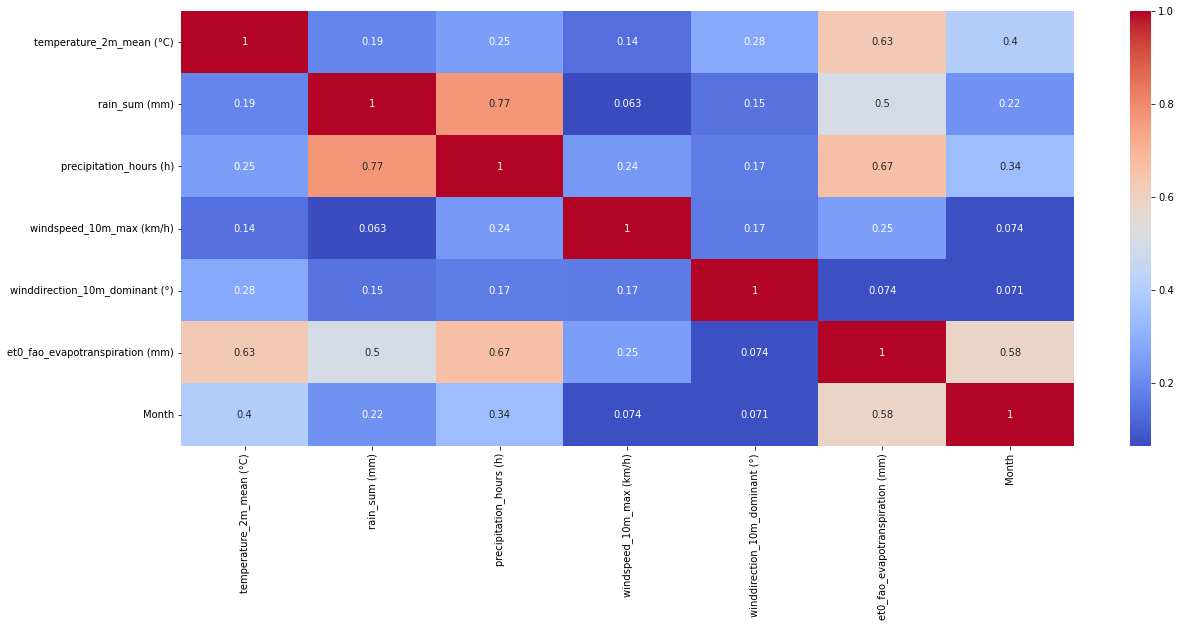

In [192]:
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [196]:
X=df.drop('rain_sum (mm)',axis=1)
y=np.sqrt(df['rain_sum (mm)'])

In [197]:
# Spliting data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [198]:
X_train

,temperature_2m_mean (°C),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),Month
923,22.0,12,11.8,118.0,2.76,8
944,21.8,5,16.2,173.0,3.42,9
1040,18.6,0,11.8,41.0,4.26,12
120,23.4,0,27.3,248.0,3.19,6
565,21.3,17,19.8,263.0,2.39,9
...,...,...,...,...,...,...
898,21.9,22,12.3,167.0,2.11,8
919,21.8,16,17.1,142.0,2.85,8
500,23.8,9,15.7,268.0,3.93,7
941,22.4,2,17.0,182.0,3.55,9


In [199]:
# Transforming data 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [200]:
# Taking instance
l_reg=LinearRegression()


In [201]:
l_reg.fit(X_train,y_train)

LinearRegression()

In [202]:
# Cheecking coefficents
l_reg.coef_

array([ 0.54395889,  4.68617224, -0.83651264,  0.16550054, -0.79148871,
       -0.05716631])

In [203]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
temperature_2m_mean (°C),0.543959
precipitation_hours (h),4.686172
windspeed_10m_max (km/h),-0.836513
winddirection_10m_dominant (°),0.165501
et0_fao_evapotranspiration (mm),-0.791489
Month,-0.057166


In [204]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

In [205]:

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [206]:
#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 0.3573069123638218.
 The Mean Squred Error(MSE) is 0.3678828533804491.
The Root Mean Squared Error(RMSE) is 0.6065334725968956.
The R2 Score is 0.8279539314063598.
